#    Driver Drowsiness Detection

In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
batch_size = 40
img_height = 256
img_width = 256

In [3]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Drowsiness/train',
    #validation_split=0.2,
    #subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/Drowsiness/test',
    #validation_split=0.2,
    #subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 2467 files belonging to 4 classes.
Found 433 files belonging to 4 classes.


In [4]:
class_names = training_ds.class_names

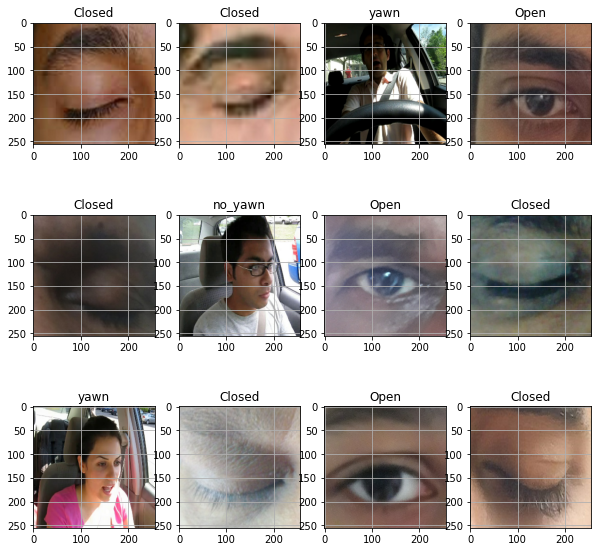

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [6]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
## lets define our CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),

  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [8]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = 10)

Epoch 1/10
62/62 [==============================] - 39s 518ms/step - loss: 1.2202 - accuracy: 0.3347 - val_loss: 0.7315 - val_accuracy: 0.5566
Epoch 2/10
62/62 [==============================] - 15s 242ms/step - loss: 0.7478 - accuracy: 0.5425 - val_loss: 0.7201 - val_accuracy: 0.5751
Epoch 3/10
62/62 [==============================] - 15s 242ms/step - loss: 0.7042 - accuracy: 0.5514 - val_loss: 0.7444 - val_accuracy: 0.5612
Epoch 4/10
62/62 [==============================] - 15s 241ms/step - loss: 0.7014 - accuracy: 0.5769 - val_loss: 0.7472 - val_accuracy: 0.5681
Epoch 5/10
62/62 [==============================] - 15s 242ms/step - loss: 0.6948 - accuracy: 0.5841 - val_loss: 0.7109 - val_accuracy: 0.5751
Epoch 6/10
62/62 [==============================] - 15s 241ms/step - loss: 0.6757 - accuracy: 0.6055 - val_loss: 0.9538 - val_accuracy: 0.5497
Epoch 7/10
62/62 [==============================] - 15s 242ms/step - loss: 0.7216 - accuracy: 0.6183 - val_loss: 0.6640 - val_accuracy: 0.6443

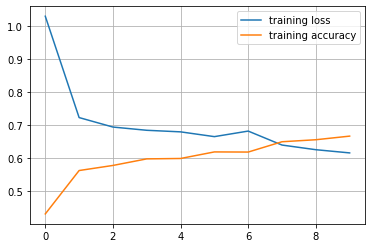

In [10]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

In [11]:
# saving model
MyCnn.save('drowsiness-stage1.h5')

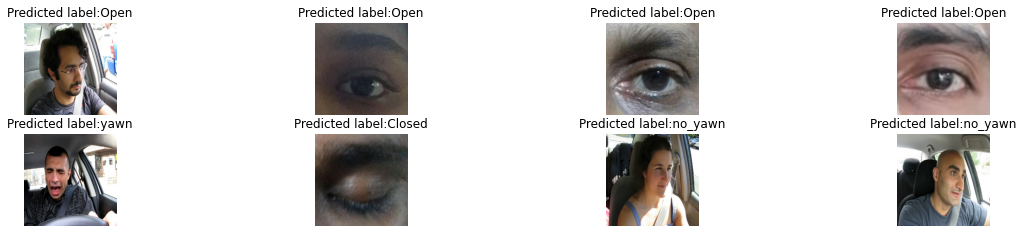

In [12]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(2):
    predictions = MyCnn.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(8):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)